In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DATA SCIENCE/PROJECTS/NLP/Restaurant Reviews.csv")

In [ ]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
df.tail()

,Review,Liked
2215,The staff was untrained and unfamiliar with th...,0
2216,The portions were skimpy and left us hungry.,0
2217,The restaurant had unclean restrooms and unple...,0
2218,The waiters were slow and forgetful with our o...,0
2219,The food was poorly cooked and tasted burnt.,0


In [ ]:
df.shape

(2220, 2)

In [ ]:
df.columns

Index(['Review', 'Liked'], dtype='object')

In [ ]:
df['Liked'].value_counts()

,count
Liked,
0,1119
1,1101


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2220 entries, 0 to 2219
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  2220 non-null   object
 1   Liked   2220 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 34.8+ KB


In [ ]:
df.isnull().sum()

,0
Review,0
Liked,0


In [ ]:
df.duplicated().sum()

612

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(1608, 2)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

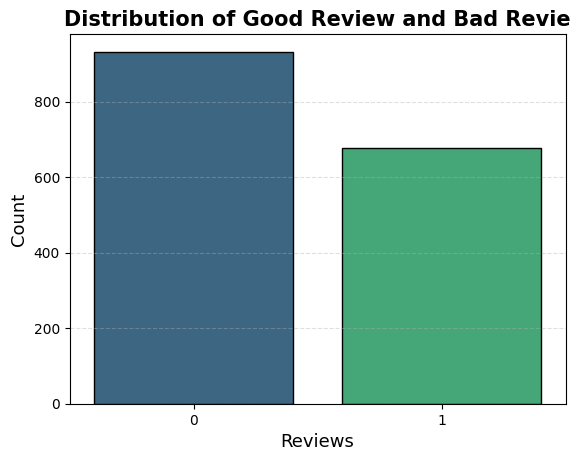

In [ ]:
# Visualizing
sns.countplot(x='Liked', data=df, hue='Liked', palette='viridis', edgecolor='black', legend=False)
plt.title('Distribution of Good Review and Bad Revie', fontsize=15, fontweight='bold')
plt.xlabel('Reviews', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()


In [ ]:
df['Review'].unique()

array(['Wow... Loved this place.', 'Crust is not good.',
       'Not tasty and the texture was just nasty.', ...,
       'The restaurant had unclean utensils and stained tablecloths. ',
       'The waiters were rude and dismissive of our concerns. ',
       'The food was bland and lacked flavor. '], dtype=object)

In [ ]:
text = df['Review']

In [ ]:
text1 = []

In [ ]:
import re
for i in text:
  text = re.sub('[^a-zA-Z\s]+','',i)
  text1.append(text)

In [ ]:
text1

['Wow Loved this place',
 'Crust is not good',
 'Not tasty and the texture was just nasty',
 'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it',
 'The selection on the menu was great and so were the prices',
 'Now I am getting angry and I want my damn pho',
 'Honeslty it didnt taste THAT fresh',
 'The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer',
 'The fries were great too',
 'A great touch',
 'Service was very prompt',
 'Would not go back',
 'The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced',
 'I tried the Cape Cod ravoli chicken with cranberrymmmm',
 'I was disgusted because I was pretty sure that was human hair',
 'I was shocked because no signs indicate cash only',
 'Highly recommended',
 'Waitress was a little slow in service',
 'This place is not worth your time let alone Vegas',
 'did not like at all',
 'The Burrittos Blah',
 'The

In [ ]:
text =pd.Series(text1)

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import nltk

nltk.download('punkt_tab')

from nltk.tokenize import word_tokenize

#apply word_tokenize
text = text.apply(lambda x: ' '.join([w for w in word_tokenize(x) if len(w) >= 3]))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
text

,0
0,Wow Loved this place
1,Crust not good
2,Not tasty and the texture was just nasty
3,Stopped during the late May bank holiday off R...
4,The selection the menu was great and were the ...
...,...
1603,The staff was unfriendly and lacked basic manners
1604,The portions were insufficient and left hungry
1605,The restaurant had unclean utensils and staine...
1606,The waiters were rude and dismissive our concerns


In [ ]:
# lowecase conversion and normalization(convert in to root form or cut the tail part)
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')
text = text.apply(lambda x:[stemmer.stem(i.lower()) for i in word_tokenize(x)]).apply(lambda x:' '.join(x))

In [ ]:
text

,0
0,wow love this place
1,crust not good
2,not tasti and the textur was just nasti
3,stop dure the late may bank holiday off rick s...
4,the select the menu was great and were the price
...,...
1603,the staff was unfriend and lack basic manner
1604,the portion were insuffici and left hungri
1605,the restaur had unclean utensil and stain tabl...
1606,the waiter were rude and dismiss our concern


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
text = text.apply(lambda x:[i for i in word_tokenize(x) if i not in stop]).apply(lambda x:' '.join(x))

In [ ]:
text

,0
0,wow love place
1,crust good
2,tasti textur nasti
3,stop dure late may bank holiday rick steve rec...
4,select menu great price
...,...
1603,staff unfriend lack basic manner
1604,portion insuffici left hungri
1605,restaur unclean utensil stain tablecloth
1606,waiter rude dismiss concern


In [ ]:
# feature extraction usig TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
train_data_vec = vec.fit_transform(text)

In [ ]:
print(train_data_vec)

  (0, 1757)	0.7521578720977823
  (0, 903)	0.5253182647107599
  (0, 1158)	0.3978683905547311
  (1, 366)	0.8846181799926734
  (1, 668)	0.4663160683768572
  (2, 1514)	0.5339794603760356
  (2, 1527)	0.5600229155855795
  (2, 1013)	0.6334352926033917
  (3, 903)	0.2246061983379921
  (3, 1454)	0.3113382694602051
  (3, 483)	0.30295854365672226
  (3, 863)	0.33481645128260823
  (3, 939)	0.30295854365672226
  (3, 107)	0.35345213259519004
  (3, 747)	0.35345213259519004
  (3, 1280)	0.35345213259519004
  (3, 1446)	0.35345213259519004
  (3, 1245)	0.23924272840495037
  (4, 1338)	0.5687511010630967
  (4, 961)	0.4953692042317739
  (4, 681)	0.42358220264798874
  (4, 1193)	0.5017067411727416
  (5, 651)	0.3602431820898354
  (5, 42)	0.5445371279139455
  (5, 1690)	0.36858328521993655
  :	:
  (1602, 1629)	0.4599781305558849
  (1602, 1051)	0.5331322187878816
  (1602, 1272)	0.514260644915163
  (1603, 1433)	0.3096079042183511
  (1603, 857)	0.34523653276145455
  (1603, 114)	0.5031784356272733
  (1603, 1618)	0.5111

In [ ]:
train_data_vec.shape

(1608, 1777)

In [ ]:
y = df['Liked'].values

In [ ]:
y

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(train_data_vec,y,test_size=0.2,random_state=0)

#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,

In [ ]:
# evaluating logistic regression

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))

print("*"*60)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("*"*60)

print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8571428571428571
************************************************************
Confusion Matrix:
[[180   9]
 [ 37  96]]
************************************************************
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.83      0.95      0.89       189
           1       0.91      0.72      0.81       133

    accuracy                           0.86       322
   macro avg       0.87      0.84      0.85       322
weighted avg       0.86      0.86      0.85       322



In [ ]:
# Naive Bayes Model

from sklearn.naive_bayes import MultinomialNB
model1 = MultinomialNB()
model1.fit(x_train,y_train)


MultinomialNB()

In [ ]:
y_pred1 = model1.predict(x_test)
y_pred1

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,

In [ ]:
# evaluating logistic regression

print("Accuracy:", accuracy_score(y_test, y_pred1))

print("*"*60)

print("Confusion Matrix:")
cm=confusion_matrix(y_test, y_pred1)
print(cm)

print("*"*60)

print("Classification Report for Naive Bayes:")
print(classification_report(y_test, y_pred1))

Accuracy: 0.8416149068322981
************************************************************
Confusion Matrix:
[[173  16]
 [ 35  98]]
************************************************************
Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       189
           1       0.86      0.74      0.79       133

    accuracy                           0.84       322
   macro avg       0.85      0.83      0.83       322
weighted avg       0.84      0.84      0.84       322



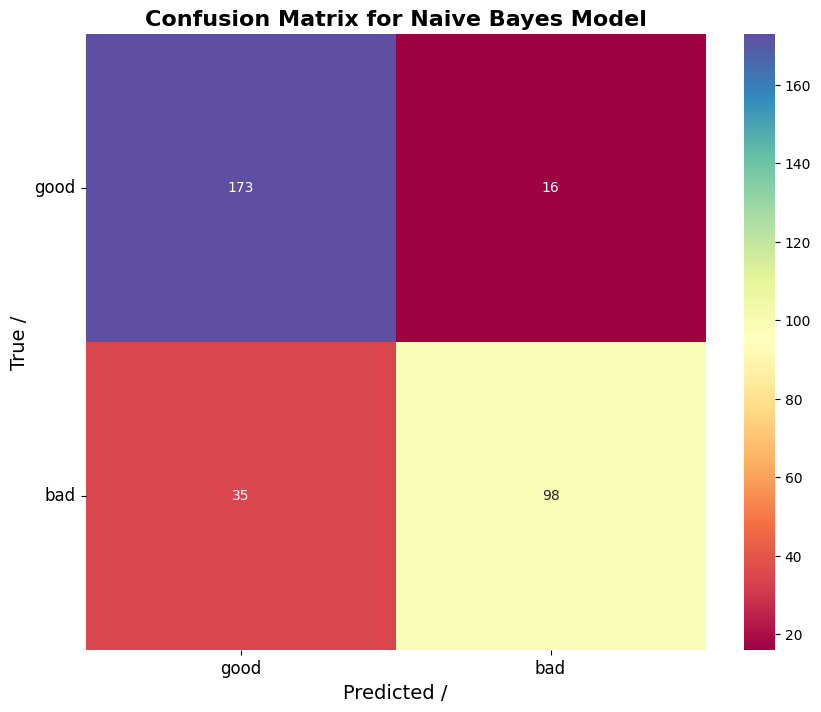

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Spectral')
plt.xlabel('Predicted /', fontsize=14)
plt.ylabel('True /', fontsize=14)
plt.title('Confusion Matrix for Naive Bayes Model', fontsize=16, fontweight='bold')
plt.xticks([0.5, 1.5], ['good', 'bad'], fontsize=12)
plt.yticks([0.5, 1.5], ['good', 'bad'], fontsize=12, rotation=0)
plt.show()

In [ ]:
#prediction
sample = "The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer."

In [ ]:
print("The result of sample message :  " ,model.predict(vec.transform([sample])))

The result of sample message :   [0]
